Programming for DHCSS Exercises: Week 10. Data Visualization

In [ ]:
### Problem 1 ###

### Execute the following code to generate data on social media platforms' user age.

import numpy as np
import pandas as pd

np.random.seed(42)

facebook_ages = np.random.normal(40, 10, 40).astype(int)
twitter_ages = np.random.normal(30, 8, 30).astype(int)
instagram_ages = np.random.normal(25, 5, 30).astype(int)

df_social_media = pd.DataFrame({
    'Facebook': pd.Series(facebook_ages),
    'Instagram': pd.Series(twitter_ages),
    'YouTube': pd.Series(instagram_ages)}).melt(var_name = 'Platform', value_name = 'Age').dropna()

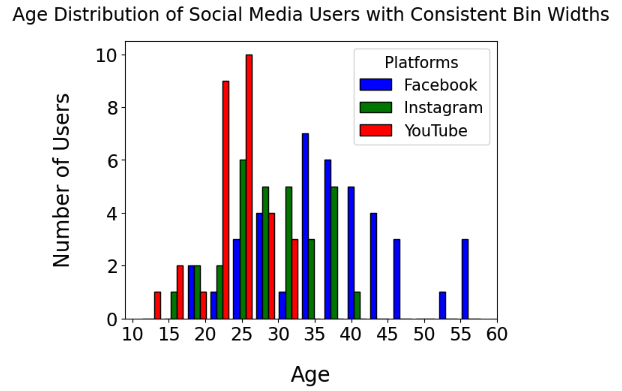

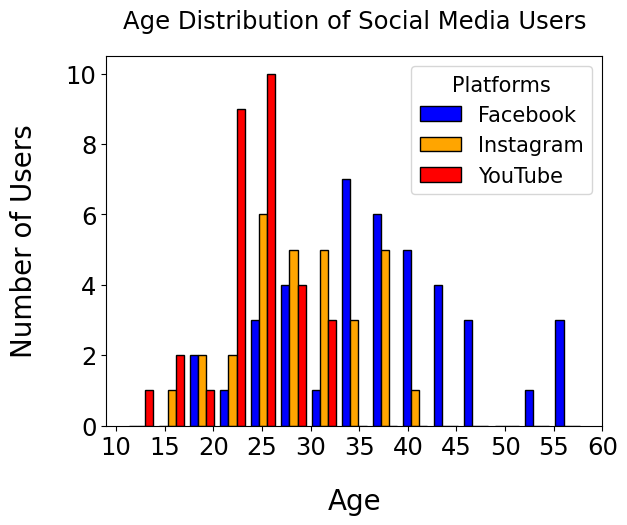

In [ ]:
### Write a code that generates the histogram above.

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist([df_social_media[df_social_media['Platform'] == 'Facebook']['Age'], # specify data
         df_social_media[df_social_media['Platform'] == 'Instagram']['Age'],
          df_social_media[df_social_media['Platform'] == 'YouTube']['Age']],
        bins = 15, # number of bins
        color = ['blue', 'orange',  'red'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Facebook', 'Instagram', 'YouTube']) # create legened labels

ax.set_xlabel('Age', fontsize = 20, labelpad = 20)
ax.set_ylabel('Number of Users', fontsize = 20, labelpad = 20)
ax.set_title('Age Distribution of Social Media Users', fontsize = 17.5, pad = 20)

ax.set_xticks(np.arange(10, 60 + 1, 5))
ax.tick_params(axis = 'both', labelsize = 17.5)

ax.legend(title = 'Platforms', title_fontsize = 15, fontsize = 15)

In [ ]:
### Problem 2 ###

### Execute the following code to generate data on a congress.

df_congress = pd.read_csv('https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_10/df_congress.csv')

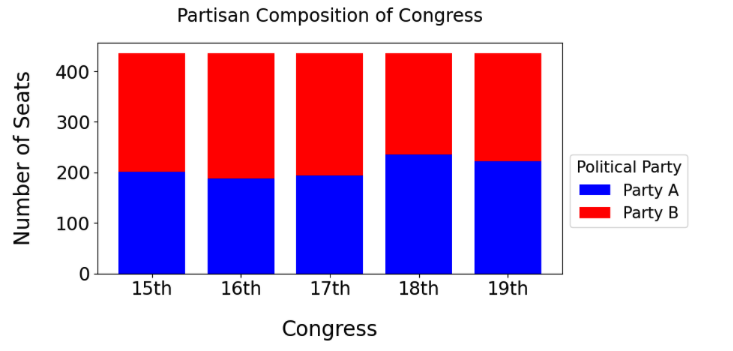

In [ ]:
### Problem 2b: Reformat the data and generate the stacked bar plot above.

df_grouped = df_congress.groupby(['Congress', 'Party']).size().unstack().reset_index()

fig, ax = plt.subplots(figsize = (8, 4))

ax.bar(df_grouped['Congress'], df_grouped['Party A'], width = 0.75, color='blue', label = 'Party A')
ax.bar(df_grouped['Congress'], df_grouped['Party B'], bottom = df_grouped['Party A'], width = 0.75, color = 'red', label = 'Party B')

ax.set_xlabel('Congress', fontsize = 20, labelpad = 20)
ax.set_ylabel('Number of Seats', fontsize = 20, labelpad = 20)
ax.set_title('Partisan Composition of Congress', fontsize = 17.5, pad = 20)

ax.tick_params(axis = 'both', labelsize = 17.5)

ax.legend(title = "Political Party",
          title_fontsize = 15, fontsize = 15,
          bbox_to_anchor = (1, 0.55))

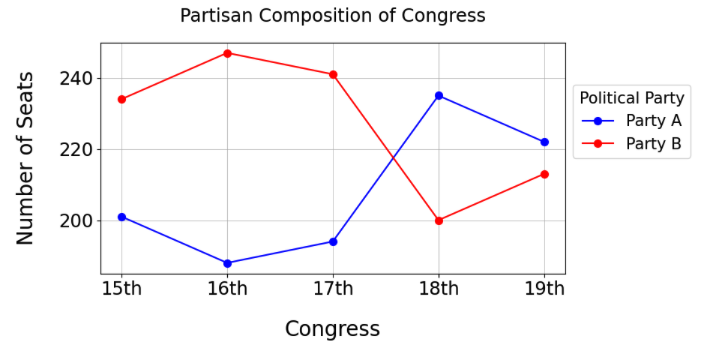

In [ ]:
### Problem 2c: Generate the line plot above using the same data.

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df_grouped['Congress'], df_grouped['Party A'], color = 'blue', marker = 'o', ms = 7, label = 'Party A')
ax.plot(df_grouped['Congress'], df_grouped['Party B'], color = 'red', marker = 'o', ms = 7, label = 'Party B')

ax.set_xlabel('Congress', fontsize = 20, labelpad = 20)
ax.set_ylabel('Number of Seats', fontsize = 20, labelpad = 20)
ax.set_title('Partisan Composition of Congress', fontsize = 17.5, pad = 20)

ax.tick_params(axis = 'both', labelsize = 17.5)

ax.legend(title = "Political Party",
          title_fontsize = 15, fontsize = 15,
          bbox_to_anchor=(1, 0.85))

ax.grid(True, axis = 'both', linestyle = '-', linewidth = 0.5)

In [ ]:
### Problem 3 ###

### Read data sets from the following URLs (note: these are carry-overs from previous week).

url_1 = "https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/policy_citations_example_2002_2018.csv"
url_2 = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/policy_citations_example_2019_2021.csv'
url_3 = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/tt_ideology.csv'

df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df3 = pd.read_csv(url_3)

In [ ]:
### Problem 3a: As df1 and df2 contain an identical set of columns for different time periods, put together df1 and df2 (recommend to reset the index).

df = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

### Problem 3b: Merge the concatenated data set (containing citations) with df3 (to get the ideology measures for think tanks).

df_idgy = pd.merge(df, df3, how = 'left', left_on = 'policy_source_id_cited', right_on = 'policy_source_id')

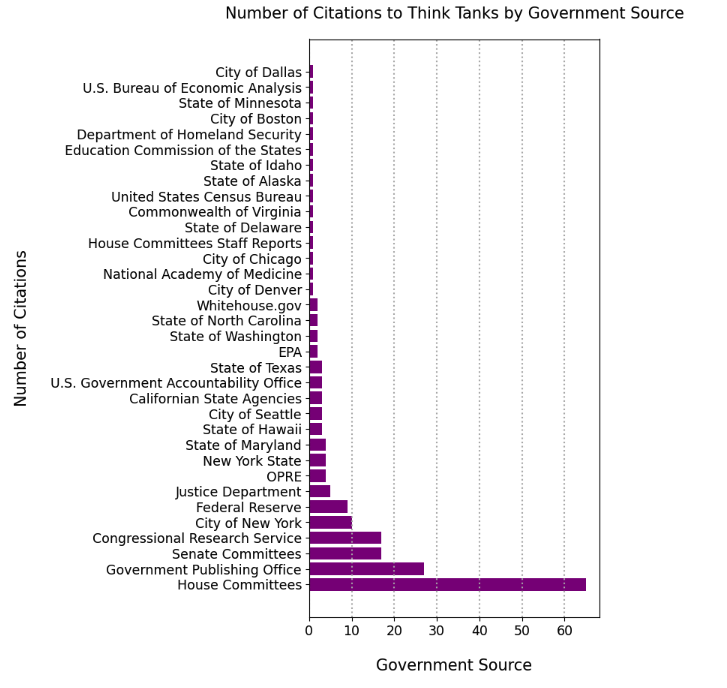

In [ ]:
### Problem 3c: Generate the horizontal bar plot above

citation_counts = df_idgy['policy_source_title_citing'].value_counts()

fig, ax = plt.subplots(figsize = (5, 10))
ax.barh(citation_counts.index, citation_counts.values, color = 'purple')

ax.set_xlabel('Government Source', fontsize = 15, labelpad = 20)
ax.set_ylabel('Number of Citations', fontsize = 15, labelpad = 20)
ax.set_title('Number of Citations to Think Tanks by Government Source', fontsize = 15, pad = 20)

ax.grid(True, axis = 'x', linestyle = ':', linewidth = 1.5)

ax.tick_params(axis = 'both', labelsize = 12.5)

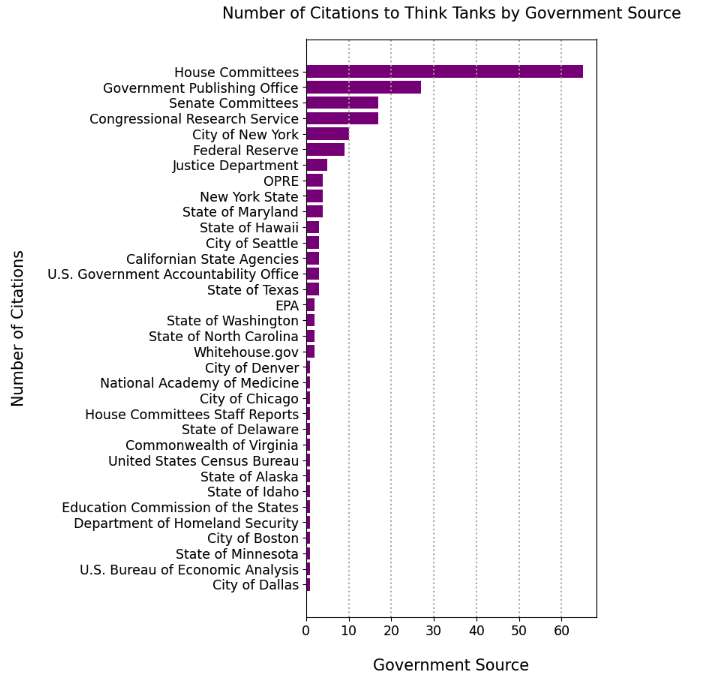

In [ ]:
### Problem 3d: Generate the horizontal bar plot above (now government sources are listed in descending order)

citation_counts = df_idgy['policy_source_title_citing'].value_counts()

fig, ax = plt.subplots(figsize = (5, 10))
ax.barh(citation_counts.index, citation_counts.values, color = 'purple')

ax.set_xlabel('Government Source', fontsize = 15, labelpad = 20)
ax.set_ylabel('Number of Citations', fontsize = 15, labelpad = 20)
ax.set_title('Number of Citations to Think Tanks by Government Source', fontsize = 15, pad = 20)

ax.invert_yaxis()

ax.grid(True, axis = 'x', linestyle = ':', linewidth = 1.5)

ax.tick_params(axis = 'both', labelsize = 12.5)

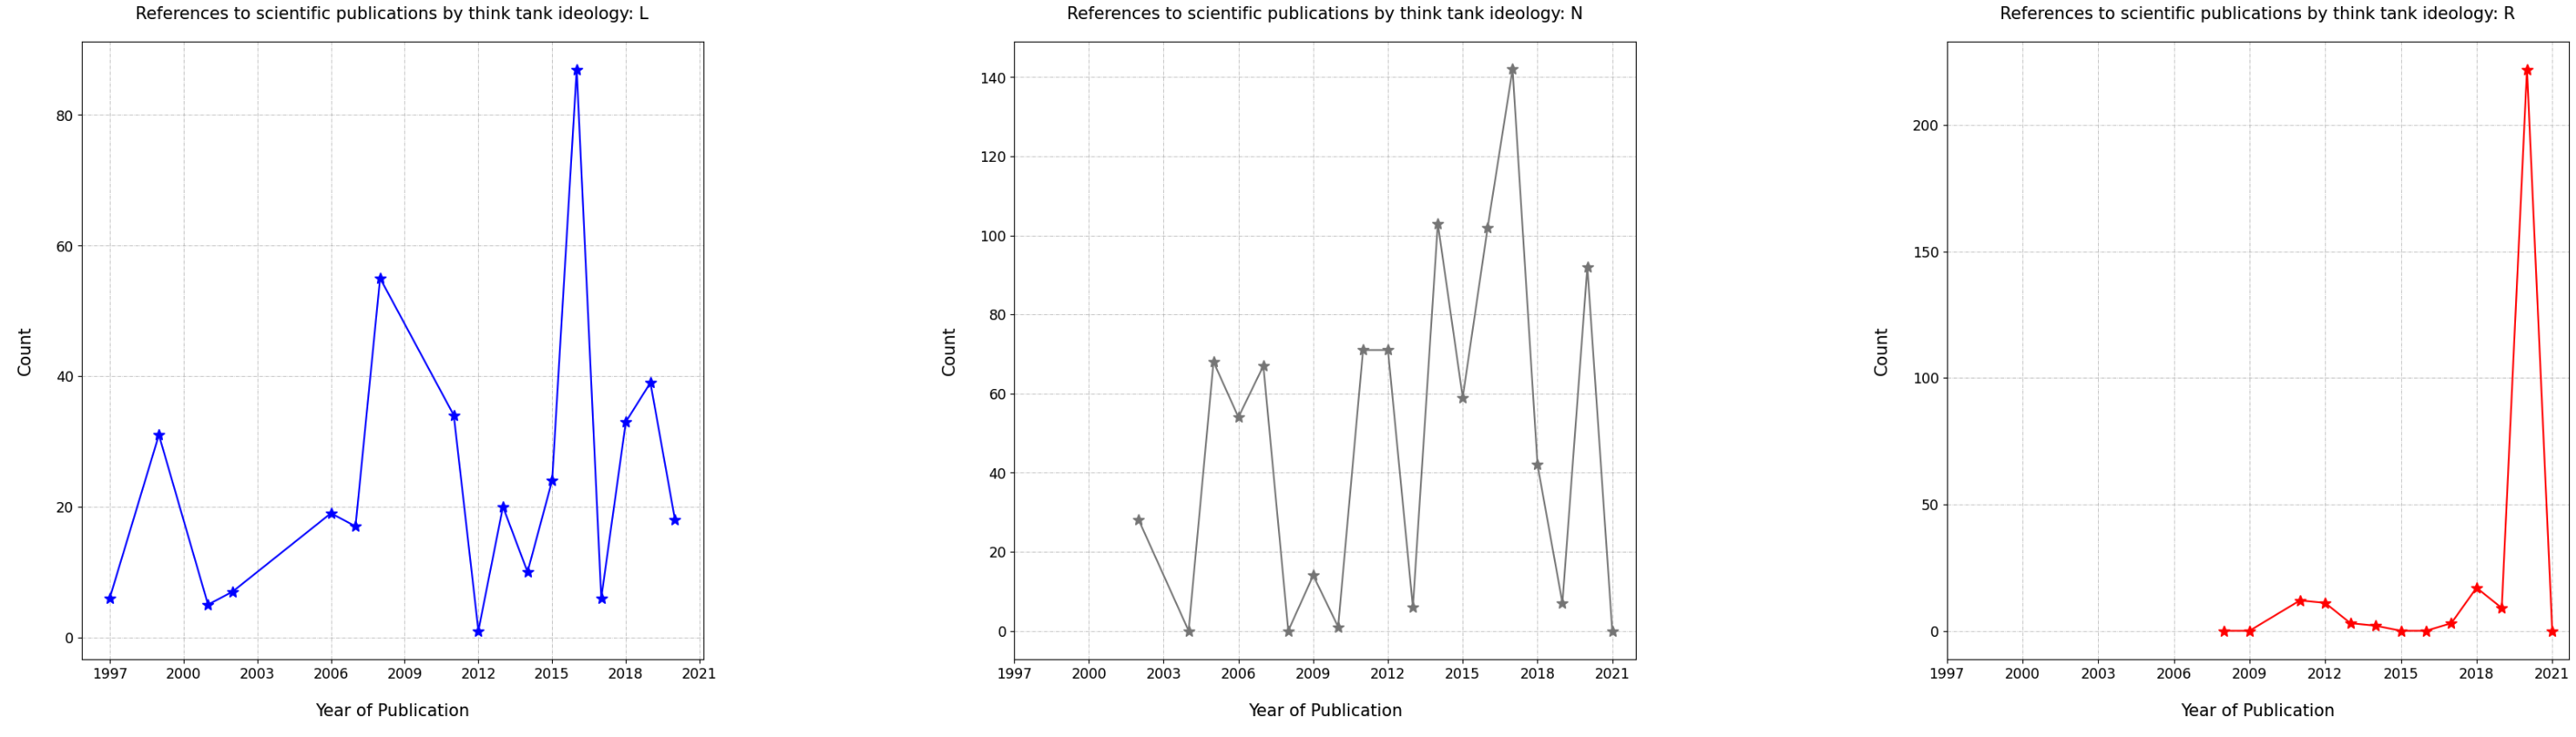

In [ ]:
### Problem 3e: Generate the three subplots above (plot the timeline of the total number of references in think tanks' policy documents, by ideology)


sum_ref_counts = df_idgy.groupby(['published_on_year_cited', 'leaning'])['ref_science_count_cited'].sum().reset_index()

fig, axs = plt.subplots(1, 3, figsize = (30, 7))

for ax, lean, color in zip(axs, ['L', 'N', 'R'], ['blue', 'gray', 'red']):

    subset = sum_ref_counts[sum_ref_counts['leaning'] == lean]
    ax.plot(subset['published_on_year_cited'], subset['ref_science_count_cited'], marker = '*', ms = 10, label = lean, color = color)

    ax.set_title(str('References to scientific publications by think tank ideology: ' + lean), fontsize = 15, pad = 20)
    ax.set_xlabel('Year of Publication', fontsize = 15, labelpad = 20)
    ax.set_ylabel('Count', fontsize = 15, labelpad = 20)
    ax.tick_params(axis = 'both', labelsize = 12.5)
    ax.set_xticks(np.arange(df_idgy['published_on_year_cited'].min(), df_idgy['published_on_year_cited'].max() + 3, 3))

    ax.grid(True, which = 'both', linestyle = '-.', linewidth = 0.5)

fig.subplots_adjust(wspace = 0.5)